# Setup

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pld
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [2]:
torch.manual_seed(0) # set fixed set of randome number on the basis of seed value

In [0]:
my_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"]) # color map

# Generating Dataset

In [4]:
# generates dataset have 1000 samples and 2 features with 4 regions. see the plot in next cell

data, labels = make_blobs(n_samples=1000, centers = 4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


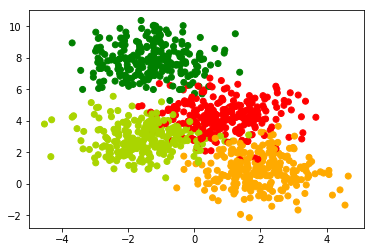

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_map)
plt.show()

In [6]:
# splitting dataset into training and validation set

X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


# Neural Network Architecture

##The nueral network which we are going to build has following architecture:
##         



-> 1 input layer with two feature as input x1 and x2

-> 1 hidden layer as first layer with 2 neurons having aggregation functions as $a_1$ and $a_2$ 
     and sigmoid as activation functions as $h_1$ and $h_2$.
     
-> 1 output layer as 3rd layer with 4 neurons having aggregation functions as $a_3,a_4,a_5$ and 
   $a_6$ as well as softmax functions (as there are four class i.e. this is multclass classification) as
   $h_3,h_4,h_5$ and $h_6$
   
-> each neuron is connected to every other neuron in next layer

-> number of weights: 12

-> number of biases: 6

-> number of ouputs: 4 as $y_1,y_2,y_3,y_4$


# Using torch tensors and autograd

In [0]:
# converting X_train, X_val, Y_train, Y_val in to pytorch tensors using map() function

X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))

In [8]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [0]:
# this model takes the input having shape (1,2) or (N,2)

def model(x):
  a1 = torch.matmul(x, weights1) + bias1 
  
  
  '''
    here,
    a1 = [a_1, a_2], first layer agrregation function vector
    weights1, bais1 = belongs to first layer
    
    shape of x = (N,2), where N = number of samples, 2 = number of features as we have created for dataset
    shape of weights1 = (2,2) as two inputs connected to all two neurons in first layer
    shape of a1 = (N,2)
    
    (N, 2) * (2, 2) -> (N, 2)
    
  '''
  
  
  h1 = a1.sigmoid() # sigmoid function get applied on every element of a1 i.e. a_1 and a_2 which outputs h_1 and h_2 integrated in h1 vector
  
  a2 = torch.matmul(h1, weights2) + bias2
  
  
  '''
    here h1 i.e. [h_1, h_2] given as input to next i.e. output layer and get multpplied with weight of next layer to produce a2 = (a_3, a_4, a_5, a_6)
    
    (N, 2) * (2, 4) -> (N, 4)
  '''
  
  
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  
  '''
    -1 in sum does the addion of exps row wise and unsqueeze brodcasts that sums along all row each to divid every exps in row
  '''
  return h2
  

In [0]:
def loss_fun(y_hat, y):
  return -(y_hat[range(y_hat.shape[0]), y].log()).mean() # hear we are calculating the cross entropy for element correspoiding to true prediction in y from every row and taking mean of them
  # here true prediction acting as an index

In [0]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1) # taking maximum from y_hat row wise
  return (pred == y).float().mean()

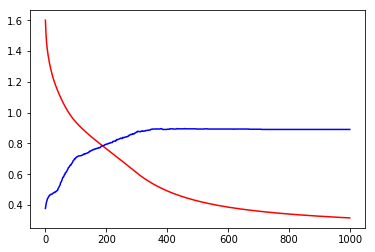

Loss before training 1.600318193435669
Loss after training 0.31565943360328674


In [12]:
torch.manual_seed(0)
weights1 = torch.randn(2,2) / math.sqrt(2)  # xavier initialization -> https://www.quora.com/What-is-an-intuitive-explanation-of-the-Xavier-Initialization-for-Deep-Neural-Networks
weights1.requires_grad_()
bias1 = torch.randn(2, requires_grad=True)

weights2 = torch.randn(2,4) / math.sqrt(2)  
weights2.requires_grad_()
bias2 = torch.randn(4, requires_grad=True)

learning_rate = 0.2
epochs = 1000

X_train_ = X_train.float()
Y_train_ = Y_train.long() # as we are using Y_train as index as we don't want it as float

loss_arr = []
acc_arr = []

for i in range(epochs):
  
  y_hat = model(X_train_)
  loss = loss_fun(y_hat, Y_train_)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train_))
  
  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_() 
    
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()

print("Loss before training", loss_arr[0])
print("Loss after training", loss_arr[-1])

# Using NN.Function

Here everything is same excpet that we are using inbuild cross entropy loss function.

In [0]:
import torch.nn.functional as F

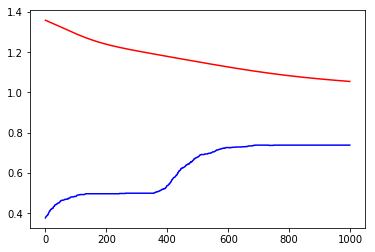

Loss before training 1.3586822748184204
Loss after training 1.0548685789108276


In [14]:
torch.manual_seed(0)
weights1 = torch.randn(2,2) / math.sqrt(2)  # xavier initialization -> https://www.quora.com/What-is-an-intuitive-explanation-of-the-Xavier-Initialization-for-Deep-Neural-Networks
weights1.requires_grad_()
bias1 = torch.randn(2, requires_grad=True)

weights2 = torch.randn(2,4) / math.sqrt(2)  
weights2.requires_grad_()
bias2 = torch.randn(4, requires_grad=True)

learning_rate = 0.2
epochs = 1000

X_train_ = X_train.float()
Y_train_ = Y_train.long() 

loss_arr = []
acc_arr = []

for i in range(epochs):
  
  y_hat = model(X_train_)
  loss = F.cross_entropy(y_hat, Y_train_)  # here we are using cross_entropy inbuilt function
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train_))
  
  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_() 
    
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()

print("Loss before training", loss_arr[0])
print("Loss after training", loss_arr[-1])

# Using NN.Parameter

In [0]:
import torch.nn as nn

In [0]:
class FFNetwork(nn.Module):  # extends nn.Mudule
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    
    # we need to wrap the weights and biases
    
    self.weights1 = nn.Parameter(torch.randn(2,2) / math.sqrt(2)) 
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2,4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
  
  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(a1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    
    return h2

In [0]:
def fit(epochs=1000, learning_rate = 1):
  
  X_train_ = X_train.float()
  Y_train_ = Y_train.long() 
  
  loss_arr = []
  acc_arr = []
  
  
  for i in range(epochs):
    y_hat = fn(X_train_)  # here fn is our defined class FFNetwork. We are instanciating it by passing X_train so it automatically called forward.
    loss = F.cross_entropy(y_hat, Y_train_)
    
    
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train_))
    
  
    
    loss.backward()
    
    with torch.no_grad():
      for param in fn.parameters():   # for all parameters in fn.Parameters as we have wrapped them in nn.Parameter, we are able to access them iteratively 
        
        param -= param.grad * learning_rate
      
      fn.zero_grad() # this the function of nn.Module which will refresh all the grads of parameters
        
  
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()

  print("Loss before training", loss_arr[0])
  print("Loss after training", loss_arr[-1])

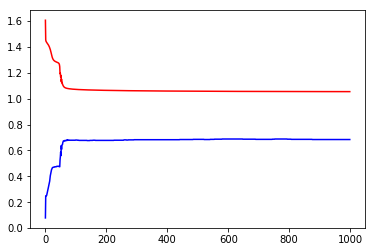

Loss before training 1.605154275894165
Loss after training 1.053890347480774


In [18]:
fn = FFNetwork()
fit()

# Using NN.Linear and Optim

In [0]:
class FFNetwork_v1(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2) # initializing weights1 of size (2,2) and biases of size 2
    self.lin2 = nn.Linear(2,4)
    
  def forward(self, X):
    a1 = self.lin1(X)  # aggregation at first layer
    h1 = a1.sigmoid()
    a2 = self.lin2(h1) # aggregation at second layer
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    
    return h2

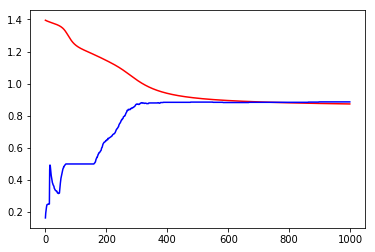

Loss before training 1.395160436630249
Loss after training 0.8738411664962769


In [20]:
fn = FFNetwork_v1()
fit()

In [0]:
from torch import optim

In [0]:
def fit_v1(epochs = 1000, learning_rate=1):
  
  X_train_ = X_train.float()
  Y_train_ = Y_train.long()
  
  loss_arr = []
  acc_arr = []
  
  opt = optim.SGD(fn.parameters(), lr = learning_rate) # initialization of SGD -> Stochastic Gradient Descent
  
  for i in range(epochs):
    y_hat = fn(X_train_)
    loss = F.cross_entropy(y_hat, Y_train_)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train_))
    
    loss.backward()
    opt.step()  # executing SGD
    opt.zero_grad()
    
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()

  print("Loss before training", loss_arr[0])
  print("Loss after training", loss_arr[-1])
    

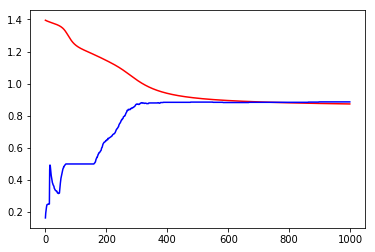

Loss before training 1.395160436630249
Loss after training 0.8738411664962769


In [23]:
fn = FFNetwork_v1()
fit()

# Using NN.Sequential

In [0]:
class FFNetwork_V2(nn.Module):
  
  def __init__(self):
    
    super().__init__()
    
    self.net = nn.Sequential(
                
               nn.Linear(2,2),
               nn.Sigmoid(),
               nn.Linear(2,4),
               nn.Softmax()
    )
    
  def forward(self, X):
    return self.net(X)

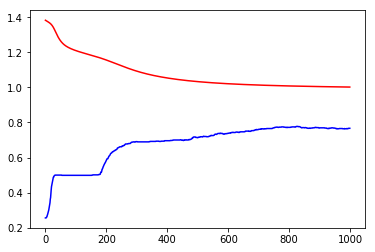

Loss before training 1.3824328184127808
Loss after training 1.001666784286499


In [25]:
fn = FFNetwork_V2()
fit_v1()

In [0]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  
  
  
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)
    
    loss.backward()
    opt.step()
    opt.zero_grad()
    
  return loss.item()
    

In [27]:
fn = FFNetwork_V2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
X_train_ = X_train.float()
Y_train_ = Y_train.long()

fit_v2(X_train_, Y_train_, fn, opt, loss_fn)


0.9914578199386597

# Running it on GPU

In [28]:
device = torch.device("cuda")

X_train_ = X_train.float().to(device)
Y_train_ = Y_train.long().to(device)

fn =  FFNetwork_V2()
fn.to(device)
tic = time.time()

print("Final Loss", fit_v2(X_train_, Y_train_, fn, opt, loss_fn))
toc  = time.time()
print("Time taken", toc-tic)

Final Loss 1.4079430103302002
Time taken 0.717144250869751


# Using RMSProp and Adam

In [29]:
opt = optim.Adam(fn.parameters(), lr=0.01)

tic = time.time()
print("Final Loss", fit_v2(X_train_, Y_train_, fn, opt, loss_fn))
toc  = time.time()
print("Time taken", toc-tic)


Final Loss 1.3240330219268799
Time taken 1.0951714515686035


In [30]:
opt = optim.RMSprop(fn.parameters(), lr=0.01)

tic = time.time()
print("Final Loss", fit_v2(X_train_, Y_train_, fn, opt, loss_fn))
toc  = time.time()
print("Time taken", toc-tic)

Final Loss 0.8500110507011414
Time taken 1.0001130104064941
